In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

## Reading the data file and checking its integity

In [3]:
data = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [5]:
data.sample()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4940,4941,46,22,19,92870,3,0.5,1,0,0,0,0,1,0


### Inference
- Data has been read correctly and no corrective action is needed to be taken

## Checking the different columns and drawing in inference from standout columns (identifying the target)

In [6]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

### Inference
- The variable ID does not add any interesting information and seems to be only an identification number. This will be discarded at a later stage
- Personal loan is abinary categorical variable and is the Target variable in this case. This is because we want to study from the previuously successful cases, which combination of attributes are most likely to be a success this time. Hence the model should be trained with Personal Loan as the target variable. 

## Checking the shape of the data

In [7]:
data.shape

(5000, 14)

### Inference
- At this stage, the data set contains 5000 data points with 14 attributes. Out of the 14 attributes, 1 attribute is ID which does not contribute to the study and one is the the target variable Personal Loan. Thus the data set contains 12 useful attributes at this moment. 

## Checking the data and if there are any missing values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### Inference
- The info and the isna fuctions show that there are no null values or missing values in the data set
- Hence no corerctive action is needed to be taken on that front

## Surveying the data and establishing characteristics of the variables

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [11]:
data.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

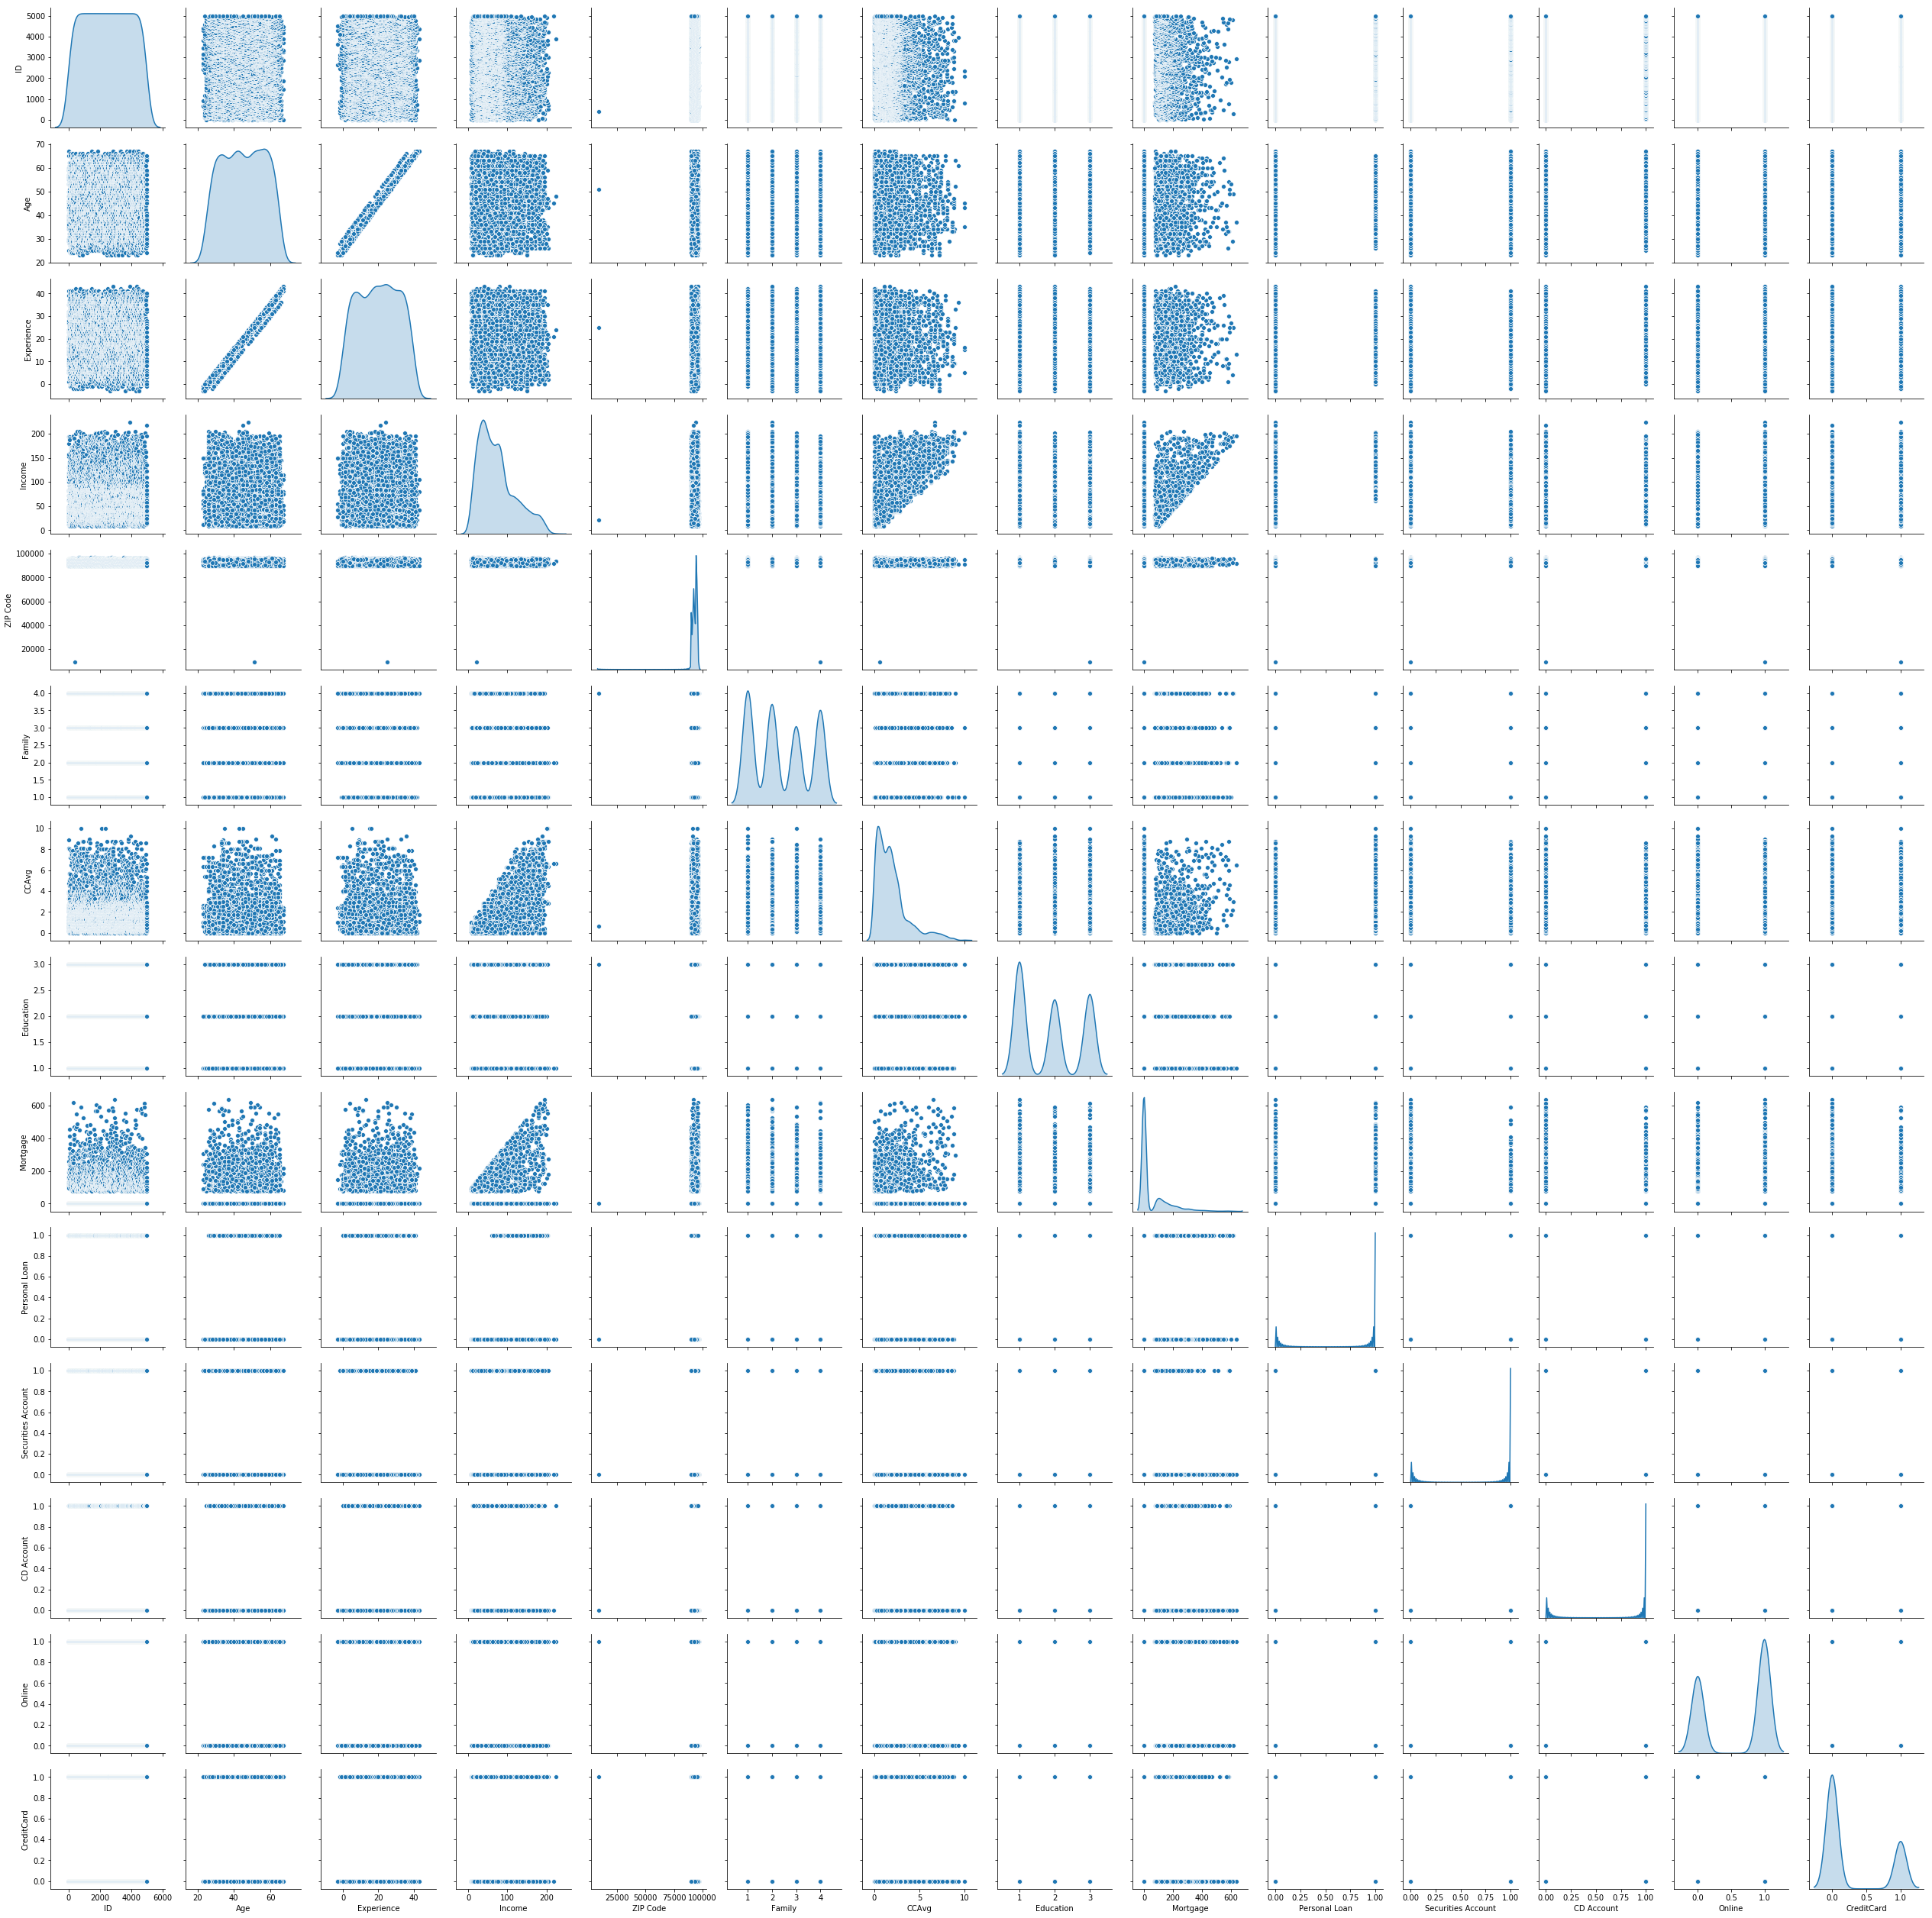

In [12]:
sns.pairplot(data, diag_kind = 'kde')

### Inference
- Age is a centrally distributed distribution. Mean is nearly equal to the mode. From the pair plot we can infer that it may not have any significant outliers.
- Age does seem to be a combination of 3 normal distributions as it as small peaks
- Experience is similarly distributed as age.
- The mean is equal to median for experience. 
- From the describe fuction we can see that there are negative values of experience in the dataset. These are either a mistake in entry or an intentional masking of data. These will be removed from the dataset. 
- Income is slightly positively skewed. The mean is greater than the median in yhe describe function which confirms the positive skewness. 
- CCAvg is highly positively skewed variable. This is also confirmed by the describe fuction. 
- Most of the individuals have a mortgage of less than 40K. However the max value is 635K
- Number of family members seem to be equally represented in the dataset with 3 having slightly lower count values as compared to the others
- Expereince has negative value as seen from the describe table
- Age and Experience seem to be highlu correlated

## Dealing with negative values in Experience

In [13]:
print("The number of negatve entries in Experience is ",data[data['Experience'] < 0]['Experience'].count())

The number of negatve entries in Experience is  52


### Inference
- As 52 accounts for about 1% of the total data set, it is not significant. 
- Hence we remove these 52 values from the dataset
- Replacing them with median or mode might bias the model
- At this stage it is best to remove these from the dataset

In [14]:
neg_exp = data[data['Experience']<0].index.astype('object')
len(neg_exp)

52

In [15]:
data.drop(neg_exp, inplace = True)

In [16]:
data.shape

(4948, 14)

### Inference
- We can see here that 52 values have been removed from the dataset

In [17]:
data.describe()['Experience']

count    4948.000000
mean       20.331043
std        11.311973
min         0.000000
25%        10.750000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

### Inference
- We see here that Experience now has no negative values
- The lowest value for expereince is now 0

## Exploring relationships between attributes

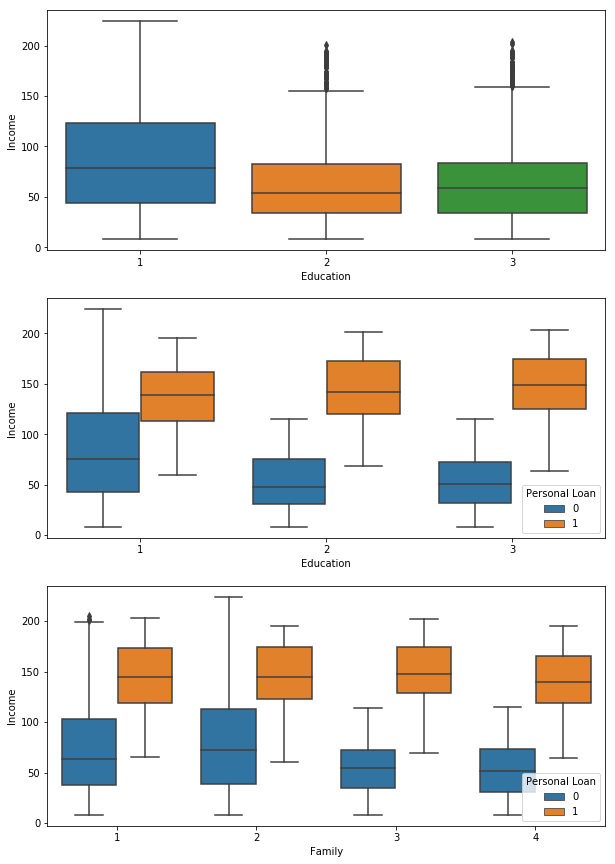

In [18]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (10,15))
sns.boxplot(x='Education',y='Income',data=data, ax= axes[0]);
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data, ax = axes[1]);
sns.boxplot(x=data.Family,y=data.Income,hue=data['Personal Loan'], ax = axes[2]);
plt.show()

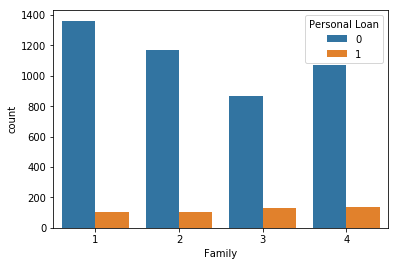

In [19]:
sns.countplot(x='Family',data=data,hue='Personal Loan');

### Inference
- The number of loan takers for each of the family sizes under cosideration seem to be same
- However, as a percentage value it is likely that people with family size of 3 have slightly higher likelyhood of taking a loan
- It seems that there is no correlation of family size with Personal Loan
- But it seems that peope who earn around 150 are more likely to take Personal Loan 

In [20]:
mort_loan = data[data['Personal Loan'] == 1]['Mortgage'].mean()
mort_no_loan = data[data['Personal Loan'] == 0]['Mortgage'].mean()
print("Average mortgage of people who have taken loan is ", mort_loan)
print("Average mortgage of people who have not taken loan is ", mort_no_loan)

Average mortgage of people who have taken loan is  100.84583333333333
Average mortgage of people who have not taken loan is  51.884735899731425


### Inference
- There seems to be a significant different between people who have taken loan and who have not in terms of outstanding mortgage values
- People who have taken loan have nearly double the mortgage value as compared to people who have not taken loan 

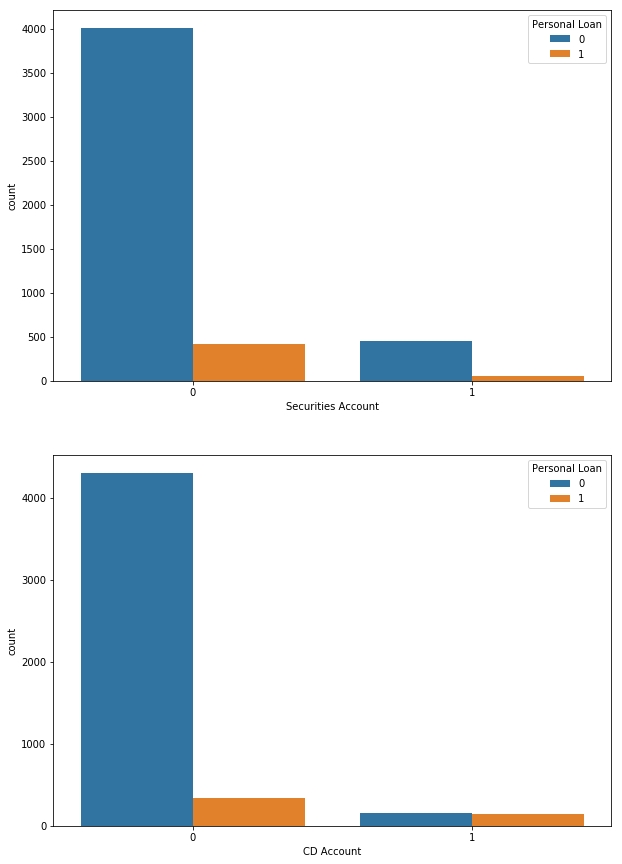

In [21]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10,15))
sns.countplot(x="Securities Account", data=data,hue="Personal Loan", ax= axes[0]);
sns.countplot(x='CD Account',data=data,hue='Personal Loan', ax = axes[1])

### Inference
- People who have CD account are equally distributed between people who have taken loan and people who have not
- However, most people who have no CD account have not taken a loan 
- People who have a Securitirs account have mostly not taken a loan 
- People who do not have a securities account have a slightly higher percent of people who have taken loan

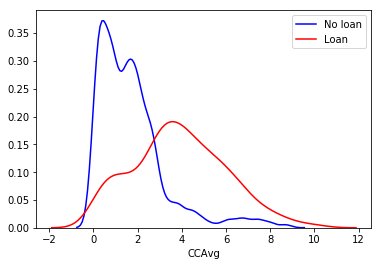

In [22]:
sns.distplot( data[data['Personal Loan'] == 0]['CCAvg'], hist = False, color = 'blue', label= 'No loan');
sns.distplot( data[data['Personal Loan'] == 1]['CCAvg'], hist = False, color = 'red', label = 'Loan');

### Inference
- It seems that people who have taken loan have higher credit card average

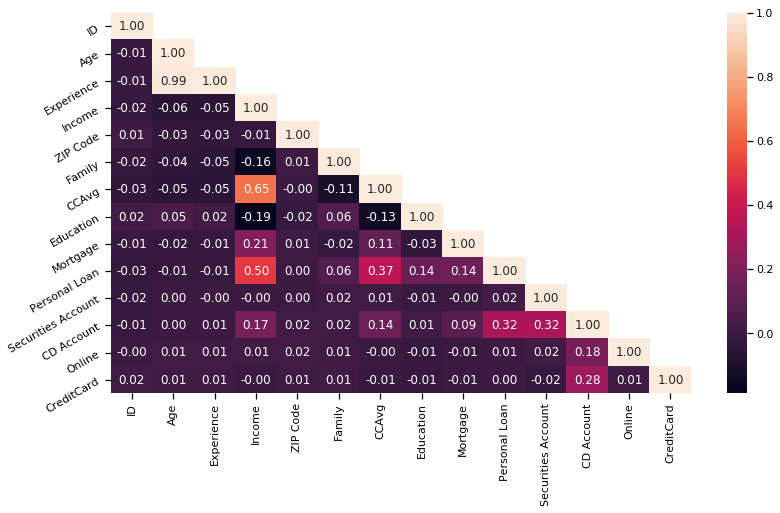

In [23]:
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

### Inference
- Age and Experience have extremely high correlation 
- CCAvg and Income have some correlation 
- CCAvg also has some correlation with Personal Loan
- Income and Personal Loan have some correlation 

#### Analysis relationship of Personal Loan with some of the numerical data

In [24]:
num_data = data[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].copy()

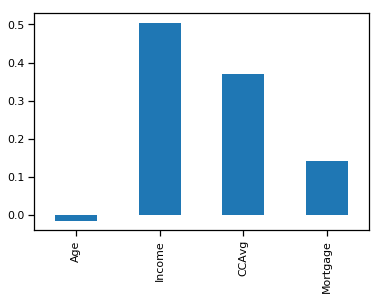

In [25]:
num_data.corr()['Personal Loan'][1:].plot.bar();

### Inference
- 'Age' and 'Mortgage' both has very low correlation with Personal Loan. 
- We may say that only 'Income' and 'CCAvg' has association with 'Personal Loan'
- This inference is similar to the one we drew from the full correlation matrix

In [26]:
dataset = data[['Income', 'CCAvg', 'Family', 'Education', 'CD Account', 'Personal Loan']].copy()

In [27]:
dataset.head(2)

,Income,CCAvg,Family,Education,CD Account,Personal Loan
0,49,1.6,4,1,0,0
1,34,1.5,3,1,0,0


In [28]:
education_loan = dataset[dataset['Personal Loan'] == 1]['Education'].value_counts()
education_loan

3    205
2    182
1     93
Name: Education, dtype: int64

### Inference
- Highest number of personal loan taken is seen to be in education category 3
- Lowest is in education categorry 1

In [29]:
edu_no_loan = dataset[dataset['Personal Loan'] == 0]['Education'].value_counts()
edu_no_loan

1    1987
3    1276
2    1205
Name: Education, dtype: int64

### Inference
- Here we see that education 1 has highest number of people who have not taken loan 
- There is very little difference between catgory 2 and 3
- It will be good to study the proportions here

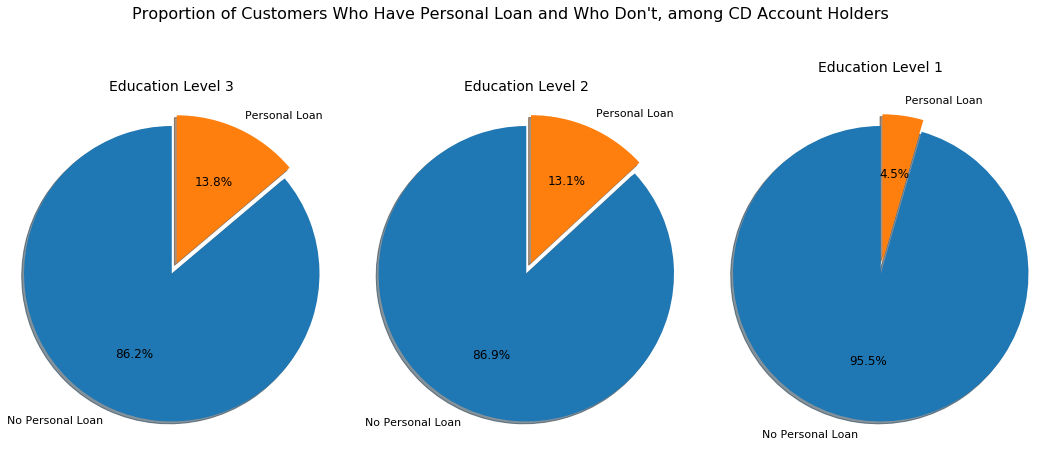

In [30]:
edu_3 = dataset[dataset['Education'] == 3]['Personal Loan'].value_counts()
edu_2 = dataset[dataset['Education'] == 2]['Personal Loan'].value_counts()
edu_1 = dataset[dataset['Education'] == 1]['Personal Loan'].value_counts()
labels = ['No Personal Loan','Personal Loan']
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (18,6),subplot_kw=dict(aspect="equal"))
plt.axis('equal')
ax1.pie(edu_3, labels = labels, autopct= '%1.1f%%', shadow = True,explode = (0, 0.1), radius = 1.25, startangle = 90)
ax1.set_title('Education Level 3',fontsize = 14, y = 1.1)

ax2.pie(edu_2, labels = labels, autopct= '%1.1f%%', shadow = True,explode = (0, 0.1), radius = 1.25, startangle = 90)
ax2.set_title('Education Level 2', fontsize = 14, y = 1.1)

ax3.pie(edu_1, labels = labels, autopct= '%1.1f%%', shadow = True,explode = (0, 0.1), radius = 1.25, startangle = 90);
ax3.set_title('Education Level 1',fontsize = 14, y = 1.1)

plt.suptitle('Proportion of Customers Who Have Personal Loan and Who Don\'t, among CD Account Holders', \
             fontsize = 16, y = 1.12);

### Inference
- Contrary to what we saw with the absolute numbers when we look at the proportions we see that education category 1 has lowest proportion of Personal Loan takers
- Catgory 2 and 3 have similar proportion of loan takers

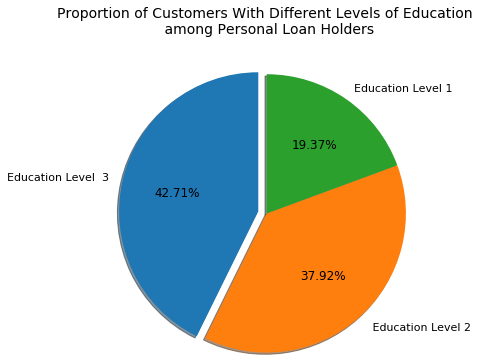

In [31]:
plt.axis('equal')
plt.title('Proportion of Customers With Different Levels of Education \n among Personal Loan Holders', \
          fontsize = 14, y = 1.3)
labels = ['Education Level  3',' Education Level 2','Education Level 1']
plt.pie(education_loan, labels = labels, autopct= '%1.2f%%', shadow = True,explode = (0.1, 0, 0), radius = 1.6, startangle = 90);
plt.savefig('Proportion_edu_levels_among_PL.png', bbox_inches = 'tight');

### Inference
- Here it is seen that among the people who have taken loan, level 1 has lowest proportion and level 3 has highest
- Although, level 2 has proportion very close to level 3
- Thus education is a good variable to keep track in the model

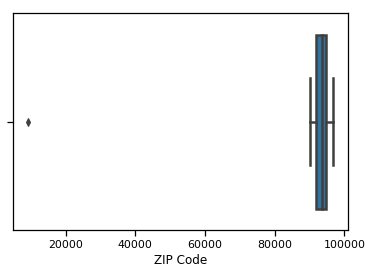

In [32]:
sns.boxplot(data['ZIP Code'])

### Inference
- It is seen that one particular value of ZIP is very low
- This may bebecause of a missing digit
- This has to be removed from the data set 

In [33]:
zip_outlier = data[data['ZIP Code']<10000].index.astype('object')
zip_outlier

Index([384], dtype='object')

### Inference
- Since only 1 data point has an outlier in ZIP it is decided to remove that data from the data set 

In [34]:
data.drop(zip_outlier, inplace = True)

In [35]:
data.describe()['ZIP Code']

count     4947.000000
mean     93168.521932
std       1761.253907
min      90005.000000
25%      91911.000000
50%      93437.000000
75%      94608.000000
max      96651.000000
Name: ZIP Code, dtype: float64

### Inference
- It is seen that the outlier has been dropped and Zip now has lowest value of 90005

### Regarding Zip
- Zip is a nominal variable and has to be tackled
- Since it is not ordered, Label Encoding cannot be used
- One of the ways that can be used here is One Hot Encoding
- However, it is seen before that there are 467 different ZIP Code values, adding 466 different sparse columns would be impractical
- Some method or logic can be applied to ZIP Code to encode it
- However, an easier method is to replace ZIP Codes by Latitutes and Longitudes
- Since this dataset is from the United Stated of America, the latitude and longitude values for these ZIP codes are obtained as a CSV files from the following address:
    https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/export/
- This data is used to convert ZIP Code to more manageable and continuous numerical type of variables - Latitude and Longitude

In [36]:
zip_code = pd.read_csv("us-zip-code-latitude-and-longitude.csv", sep=';')

In [37]:
zip_code.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,71937,Cove,AR,34.398483,-94.39398,-6,1,"34.398483,-94.39398"
1,72044,Edgemont,AR,35.624351,-92.16056,-6,1,"35.624351,-92.16056"
2,56171,Sherburn,MN,43.660847,-94.74357,-6,1,"43.660847,-94.74357"
3,49430,Lamont,MI,43.010337,-85.89754,-5,1,"43.010337,-85.89754"
4,52585,Richland,IA,41.194129,-91.98027,-6,1,"41.194129,-91.98027"


### Inference
- We see here that there are a lot of other information in the CSV file but these details are not needed for our project. 
- Hence we drop them

In [38]:
drop_zip = ['City', 'State', 'Timezone', 'Daylight savings time flag', 'geopoint']
zip_code = zip_code.drop(drop_zip, axis = 1)

In [39]:
zip_code.head()

,Zip,Latitude,Longitude
0,71937,34.398483,-94.39398
1,72044,35.624351,-92.16056
2,56171,43.660847,-94.74357
3,49430,43.010337,-85.89754
4,52585,41.194129,-91.98027


In [40]:
zip_code.shape

(43191, 3)

In [41]:
zip_code.dtypes

Zip            int64
Latitude     float64
Longitude    float64
dtype: object

In [42]:
zip_code.rename(columns={'Zip':'ZIP Code'}, inplace=True)

In [43]:
data_latlon = pd.merge(data, zip_code, on=['ZIP Code'], how='inner')
data_latlon.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Latitude,Longitude
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,34.151066,-118.08974
1,456,30,4,60,91107,4,2.2,2,0,0,0,0,1,0,34.151066,-118.08974
2,460,35,10,200,91107,2,3.0,1,458,0,0,0,0,0,34.151066,-118.08974
3,576,54,30,93,91107,1,2.7,2,0,0,0,0,1,0,34.151066,-118.08974
4,955,37,12,169,91107,2,5.2,3,249,1,0,0,1,0,34.151066,-118.08974


- It is seen that latitude longitude is successfully added from the downloaded datafile to the bank datafile
- At this point ZIP Code is a redundant variable and can be dropped 

In [44]:
data_latlon.drop('ZIP Code', axis = 1, inplace = True)
            

In [45]:
data_latlon.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Latitude,Longitude
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0,34.151066,-118.08974
1,456,30,4,60,4,2.2,2,0,0,0,0,1,0,34.151066,-118.08974
2,460,35,10,200,2,3.0,1,458,0,0,0,0,0,34.151066,-118.08974
3,576,54,30,93,1,2.7,2,0,0,0,0,1,0,34.151066,-118.08974
4,955,37,12,169,2,5.2,3,249,1,0,0,1,0,34.151066,-118.08974


### About ID and Experience
- ID is another vatiable which does not add any value to the data set. Hence it is removed
- Age and Experience are also highly correlated. It is good to remove one of them
- Experience is removed. 

In [46]:
data_latlon.drop('ID', axis = 1, inplace = True)
data_latlon.drop('Experience', axis =1, inplace = True)

In [47]:
data_latlon.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4915.0,45.569888,11.322040,24.000000,36.000000,46.000000,55.00000,67.000000
Income,4915.0,73.877925,46.121314,8.000000,39.000000,64.000000,98.00000,224.000000
Family,4915.0,2.392065,1.148293,1.000000,1.000000,2.000000,3.00000,4.000000
CCAvg,4915.0,1.936051,1.745362,0.000000,0.700000,1.500000,2.60000,10.000000
Education,4915.0,1.878128,0.840082,1.000000,1.000000,2.000000,3.00000,3.000000
Mortgage,4915.0,56.795524,101.975317,0.000000,0.000000,0.000000,101.50000,635.000000
Personal Loan,4915.0,0.097050,0.296056,0.000000,0.000000,0.000000,0.00000,1.000000
Securities Account,4915.0,0.104171,0.305513,0.000000,0.000000,0.000000,0.00000,1.000000
CD Account,4915.0,0.061445,0.240168,0.000000,0.000000,0.000000,0.00000,1.000000
Online,4915.0,0.597152,0.490521,0.000000,0.000000,1.000000,1.00000,1.000000


In [48]:
data_latlon.isna().sum()

Age                   0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Latitude              0
Longitude             0
dtype: int64

### Inference
- There is no missing data
- This also goes to show that the lattitude and longitude data has been incorporated without any miss

## Creating the target variable (y) and the features (X)

In [49]:
X = data_latlon.drop('Personal Loan', axis = 1)
y = data_latlon['Personal Loan']

In [50]:
X.shape

(4915, 12)

In [51]:
y.shape

(4915,)

### Inference
- It is seen that there are 4915 records 
- 12 features are present in the feature set (X)

## KNN

- Determining the best number of neighbours 
- Strategy used is to average out the recall score for different random states of splitting
- Recall is used as the score here as False negatives are very important here
- The bank cannot afford to miss target customers who would be keen to take personal loan based on their background
- Then use the value of n-neighbour which has the highest average
- This is used as a first guess to start the KNN model

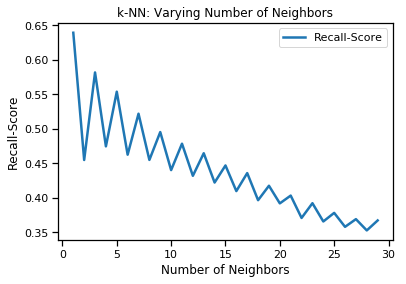

In [52]:

neighbors = np.arange(1, 30)
rec_plot = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    rec = []
    
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        predicted = knn.predict(scaledX_test)
        conf = confusion_matrix(y_test, predicted)
        precision = conf[1,1]/(conf[1,1]+conf[0,1])
        recall = conf[1,1]/(conf[1,1]+conf[1,0])
        rec.append(recall)
        #f1_score = 2*precision*recall/(precision + recall)
        #f1.append(f1_score)
        
    #Compute fn
    rec_plot[i] = np.mean(rec)
   
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, rec_plot, label = 'Recall-Score')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Recall-Score')
plt.show()

### Inference
- Optimum n-neighbours is found to be 3
- Converting the scaled training and testing dataset to dataframes for ease of handling

In [53]:
x_training_data = pd.DataFrame(scaledX_train, columns=X.columns)
x_testing_data = pd.DataFrame(scaledX_test, columns=X.columns)

### Inference
- For n=3 we find the best combination of features for the model
- We use all 12 variables to start off 

In [54]:
knn = KNeighborsClassifier(n_neighbors=3)
sfs1 = sfs(knn, k_features = 12, forward = True, scoring = 'recall', cv = 5)
sfs1 = sfs1.fit(x_training_data.values, y_train.values)



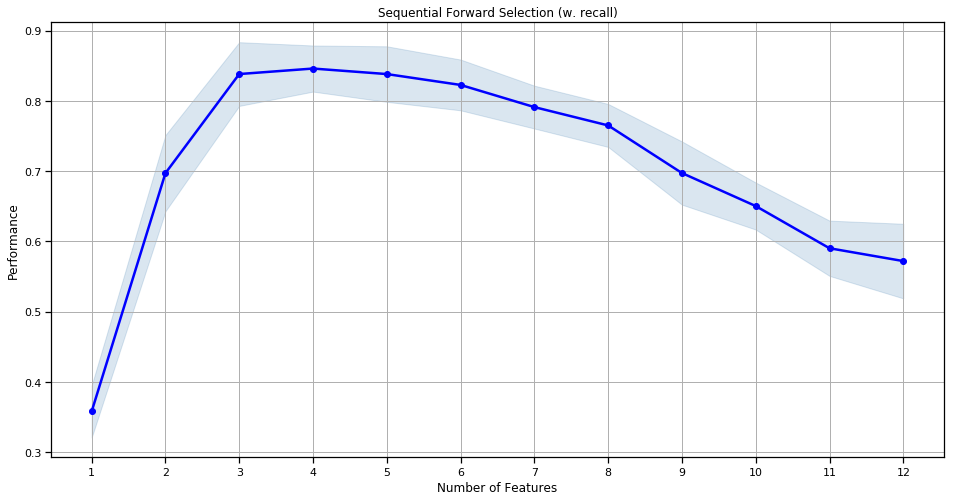

In [55]:


fig = plot_sfs(sfs1.get_metric_dict(), figsize = (16,8))

plt.title('Sequential Forward Selection (w. recall)')
plt.grid()
plt.show()

### Inference
- From the above plot it is seen that the best feature set contains 4 features
- Runinng feature selection with 3 features to get the features 

In [56]:
sfs1 = sfs(knn, k_features = 3, forward = True, scoring = 'recall', cv = 5)
sfs1 = sfs1.fit(x_training_data, y_train.values)
sfs1.get_metric_dict()
columnList = list(x_training_data.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

[1, 2, 4]
['Income', 'Family', 'Education']


### Inference
- The 3 best features (their combibations) are Income, Family and Education
- We had already seen in EDA how some of these were predicted to be of high importance

In [57]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
knn.fit(x_training_data[subsetColumnList], y_train)
y_train_pred = knn.predict(x_training_data[subsetColumnList])
y_test_pred = knn.predict(x_testing_data[subsetColumnList])
dat = [[knn.score(x_training_data[subsetColumnList], y_train), recall_score(y_train_pred, y_train), f1_score(y_train_pred, y_train)], [knn.score(x_testing_data[subsetColumnList], y_test),recall_score(y_test_pred, y_test), f1_score(y_test_pred, y_test)]]
ind = ['Training', 'Testing']
cols = ['Accuracy', 'f1-Score', 'Recall Score']
df_score_knn = pd.DataFrame(dat,index = ind, columns = cols)



In [58]:
df_score_knn.T

,Training,Testing
Accuracy,0.986012,0.976602
f1-Score,0.971264,0.917647
Recall Score,0.924761,0.871508


### Inferrence
- The above table shows the accuracy of 0.99 (training) and 0.98 (testing) has been achieved with KNN
- The recall score is 0.97 (training) and 0.91(testing)
- The f1-score is 0.92 (training) and 0.87 (testing)

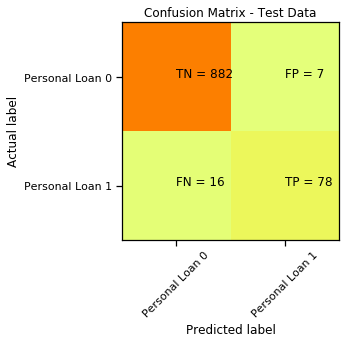

In [59]:
cm = confusion_matrix(y_test, y_test_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Personal Loan 0','Personal Loan 1']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### Inference
- The confusion matrix shows that number of false negatives is 16
- The false negative is of great importance here is because the bank does not want to miss targetting their compaign to someone who islikely to take Personal Loan
- False positives are 7 which is not a bad number 
- False positives are less serious in this case

##### Preparing data for the ROC curve that will be used to compare the different models

In [60]:
y_pred_prob = knn.predict_proba(x_testing_data[subsetColumnList])[:, 1]

In [61]:
len(y_pred_prob)

983

In [62]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob)

### Calculating the AUC

In [63]:
auc_knn = roc_auc_score(y_test, y_pred_prob)

In [64]:
auc_knn

0.9373249886317402

### Inference
- We see that the AUC for this KNN model is 0.93

#### Verification that 3 neighbours still high values of f1 for the new feature set

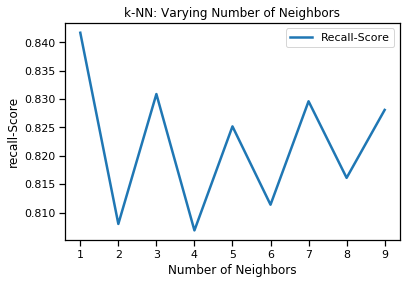

In [65]:
neighbors = np.arange(1, 10)
rec_plot = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    rec = []
    
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X[subsetColumnList], y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        predicted = knn.predict(scaledX_test)
        conf = confusion_matrix(y_test, predicted)
        precision = conf[1,1]/(conf[1,1]+conf[0,1])
        recall = conf[1,1]/(conf[1,1]+conf[1,0])
        rec.append(recall)
        #f1_score = 2*precision*recall/(precision + recall)
        #f1.append(f1_score)
        
    #Compute fn
    rec_plot[i] = np.mean(rec)
   
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, rec_plot, label = 'Recall-Score')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('recall-Score')
plt.show()

### Inference
- It is seen that even with the reduced number of features 3 is the best and optimum values of N-neighbours

## LOGISTIC REGRESSION

- Performing feature selection for logistic regression model
- Here we donot need to split the data again as we are using the same scaled and split data used for KNN

In [66]:
lr = LogisticRegression()
sfs1 = sfs(lr, k_features = 12, forward = True, scoring = 'recall', cv = 5)
sfs1 = sfs1.fit(x_training_data.values, y_train.values)



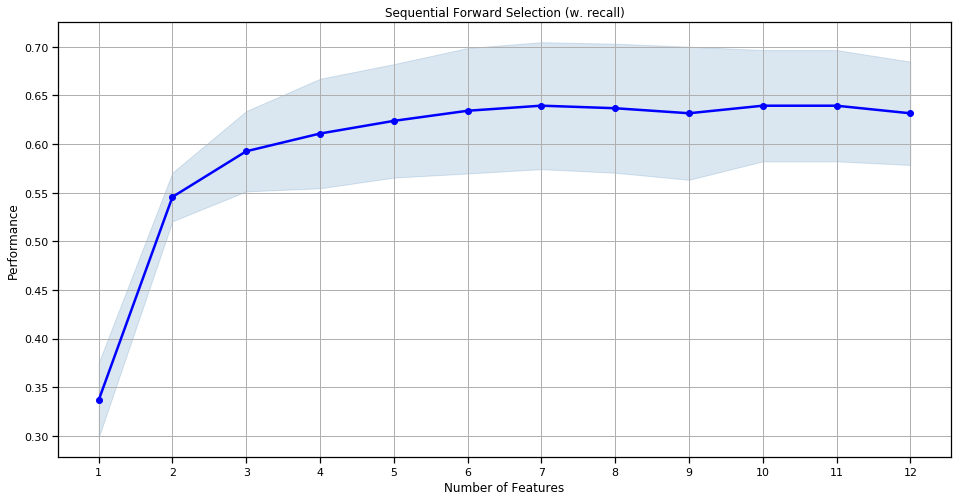

In [67]:

fig = plot_sfs(sfs1.get_metric_dict(), figsize = (16,8))

plt.title('Sequential Forward Selection (w. recall)')
plt.grid()
plt.show()

### Inference
- From the above plot it is seen that 6 or 7 is the optimum number of features
- Since the increase in f1 score is not very high from 6 to 7 we use 6 features
- Next step is to find the 6 combined features which gives best result

In [68]:
sfs1 = sfs(lr, k_features = 6, forward = True, scoring = 'recall', cv = 5)
sfs1 = sfs1.fit(x_training_data.values, y_train.values)
sfs1.get_metric_dict()
columnList = list(x_training_data.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

[1, 2, 4, 6, 7, 8]
['Income', 'Family', 'Education', 'Securities Account', 'CD Account', 'Online']


### Inference
- We see the most important features for Logistic regression are 'Income', 'Family', 'Education', 'Securities Account', 'CD Account', 'Online'

In [69]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
lr.fit(x_training_data[subsetColumnList], y_train)
y_train_pred = lr.predict(x_training_data[subsetColumnList])
y_test_pred = lr.predict(x_testing_data[subsetColumnList])
dat = [[lr.score(x_training_data[subsetColumnList], y_train), f1_score(y_train_pred, y_train), recall_score(y_train_pred, y_train)], [lr.score(x_testing_data[subsetColumnList], y_test),f1_score(y_test_pred, y_test),recall_score(y_test_pred, y_test)]]
ind = ['Training', 'Testing']
cols = ['Accuracy', 'f1-Score', 'Recall Score']
df_score_lr = pd.DataFrame(dat,index = ind, columns = cols)

In [70]:
df_score_lr.T

,Training,Testing
Accuracy,0.947864,0.949135
f1-Score,0.703329,0.687500
Recall Score,0.788961,0.833333


### Inference
- The above table shows the accuracy of 0.95 (training) and 0.95 (testing) has been achieved with KNN
- The f1 score is 0.70 (training) and 0.69(testing)
- The recall score is 0.79 for training and 0.79 for testing

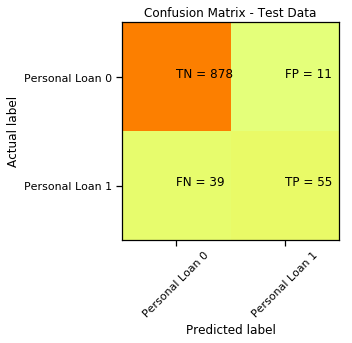

In [71]:
cm = confusion_matrix(y_test, y_test_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Personal Loan 0','Personal Loan 1']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### Inference
- The confusion matrix shows that number of false negatives is 39
- The false negative is of great importance here is because the bank does not want to miss targetting their compaign to someone who islikely to take Personal Loan
- False positives are 11 which is not a bad number 
- False positives are less serious in this case

##### Calculating the values for ROC

In [72]:
y_pred_prob = lr.predict_proba(x_testing_data[subsetColumnList])[:, 1]

In [73]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob)

In [74]:
auc_lr = roc_auc_score(y_test, y_pred_prob)

In [75]:
auc_lr

0.948681281861044

- Cross Validated AUC Score is 0.95

## NAIVE BAYES

In [76]:
gnb = GaussianNB()

- Performing Feature Selection for Naive Bayes

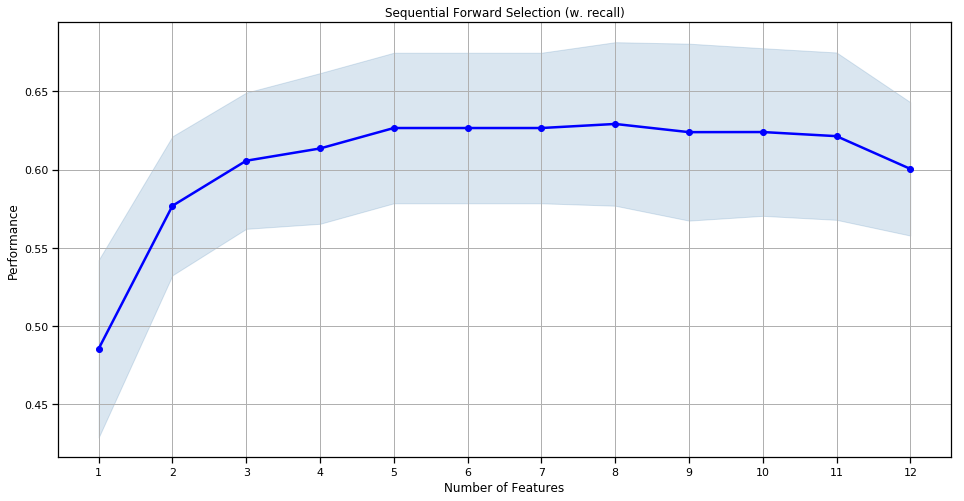

In [77]:
sfs1 = sfs(gnb, k_features = 12, forward = True, scoring = 'recall', cv = 5)
sfs1 = sfs1.fit(x_training_data.values, y_train.values)

fig = plot_sfs(sfs1.get_metric_dict(), figsize = (16,8))

plt.title('Sequential Forward Selection (w. recall)')
plt.grid()
plt.show()


### Inference
- We see that the best number of features is 5
- Next step is to determine the 5 best features

In [78]:
sfs1 = sfs(gnb, k_features = 5, forward = True, scoring = 'recall', cv = 5)
sfs1 = sfs1.fit(x_training_data.values, y_train.values)
sfs1.get_metric_dict()
columnList = list(x_training_data.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

[1, 2, 3, 4, 5]
['Income', 'Family', 'CCAvg', 'Education', 'Mortgage']


### Inference
- The best combination of features for Naive Bayes is found to be 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage'

In [79]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
gnb.fit(x_training_data[subsetColumnList], y_train)
y_train_pred = gnb.predict(x_training_data[subsetColumnList])
y_test_pred = gnb.predict(x_testing_data[subsetColumnList])
dat = [[gnb.score(x_training_data[subsetColumnList], y_train), f1_score(y_train_pred, y_train), recall_score(y_train_pred, y_train)], [gnb.score(x_testing_data[subsetColumnList], y_test),f1_score(y_test_pred, y_test), recall_score(y_test_pred, y_test)]]
ind = ['Training', 'Testing']
cols = ['Accuracy', 'f1-Score','Recall Score']
df_score_gnb = pd.DataFrame(dat,index = ind, columns = cols)

In [80]:
df_score_gnb.T

,Training,Testing
Accuracy,0.904883,0.898271
f1-Score,0.561033,0.494949
Recall Score,0.509595,0.471154


### Inference
- The above table shows the accuracy of 0.90 (training) and 0.90 (testing) has been achieved with KNN
- The f1 score is 0.56 (training) and 0.50(testing)
- The recall score is 0.51 (training) and 0.47 (testing)

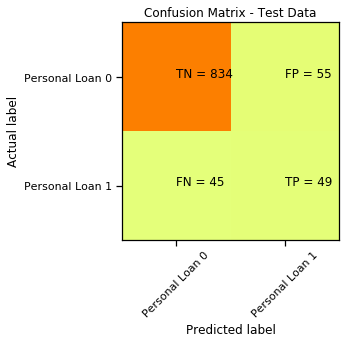

In [81]:
cm = confusion_matrix(y_test, y_test_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Personal Loan 0','Personal Loan 1']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### Inference
- The confusion matrix shows that number of false negatives is 45
- The false negative is of great importance here is because the bank does not want to miss targetting their compaign to someone who islikely to take Personal Loan
- False positives are 13 which is also bad
- False positives are less serious in this case

##### Calculating paramters for ROC curve

In [82]:
y_pred_prob = gnb.predict_proba(x_testing_data[subsetColumnList])[:, 1]

In [83]:
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_pred_prob)

In [84]:
auc_gnb = roc_auc_score(y_test, y_pred_prob)
auc_gnb

0.9227676327693081

- The AUC score is 0.92

#### The question asked for KNN, Logistic Regression and Neive Bayes. Among them KNN has the best performance. If we use this KNN model we will need to perform threshold tuning during production as seen from the AUC curve. 
- For curiosity Decision tree model is also evaluated as a part of this exercise

## Decision Tree

- Performing Grid Search to find best model parameters for Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 15), 'min_samples_leaf': np.arange(2,20), 'min_samples_split':np.arange(2,20)}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

dtree_grid_search(x_training_data, y_train, 5)


{'criterion': 'entropy',
 'max_depth': 13,
 'min_samples_leaf': 4,
 'min_samples_split': 8}

In [86]:


dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf = 2, min_samples_split = 19)
dt.fit(x_training_data, y_train)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=19,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [87]:
print(dt.score(x_training_data, y_train))
print(dt.score(x_testing_data, y_test))

0.9900813835198372
0.9837232960325534


- With this model we now perform feature selection

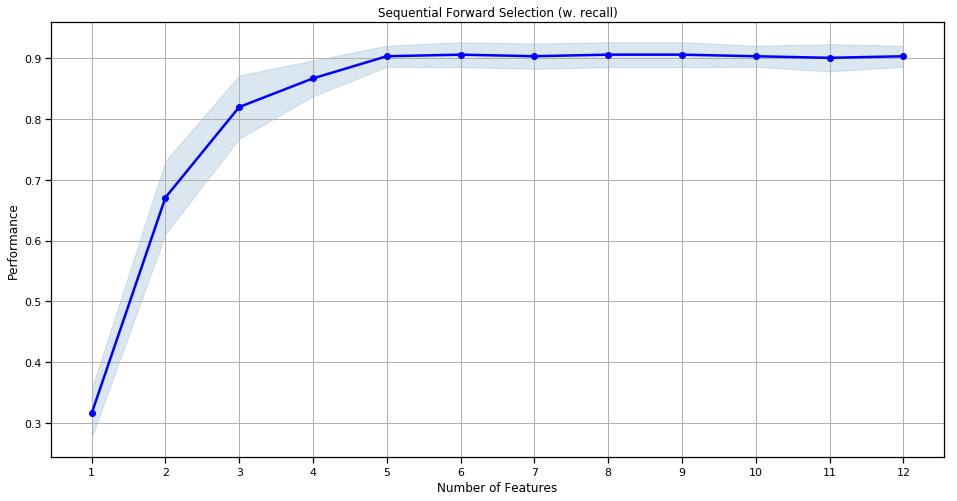

In [88]:
sfs1 = sfs(dt, k_features = 12, forward = True, scoring = 'recall', cv = 5)
sfs1 = sfs1.fit(x_training_data.values, y_train.values)

fig = plot_sfs(sfs1.get_metric_dict(), figsize = (16,8))

plt.title('Sequential Forward Selection (w. recall)')
plt.grid()
plt.show()


### Inference
- 5 features seem to be the best in this case

In [89]:
sfs1 = sfs(dt, k_features = 5, forward = True, scoring = 'f1', cv = 5)
sfs1 = sfs1.fit(x_training_data.values, y_train.values)
sfs1.get_metric_dict()
columnList = list(x_training_data.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

[1, 2, 3, 4, 7]
['Income', 'Family', 'CCAvg', 'Education', 'CD Account']


### Inference
- The most important features are 'Income', 'Family', 'CCAvg', 'Education', 'CD Account'

In [90]:
#dt = DecisionTreeClassifier(criterion= 'gini',max_depth=11, min_samples_leaf = 3)
dt.fit(x_training_data[subsetColumnList], y_train)
print(dt.score(x_training_data[subsetColumnList], y_train))
print(dt.score(x_testing_data[subsetColumnList], y_test))

0.9885554425228891
0.9857578840284842


In [91]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
dt.fit(x_training_data[subsetColumnList], y_train)
y_train_pred = dt.predict(x_training_data[subsetColumnList])
y_test_pred = dt.predict(x_testing_data[subsetColumnList])
dat = [[dt.score(x_training_data[subsetColumnList], y_train), f1_score(y_train_pred, y_train), recall_score(y_train_pred, y_train)], [dt.score(x_testing_data[subsetColumnList], y_test),f1_score(y_test_pred, y_test), recall_score(y_test_pred, y_test)]]
ind = ['Training', 'Testing']
cols = ['Accuracy', 'f1-Score', 'Recall Score']
df_score_dt = pd.DataFrame(dat,index = ind, columns = cols)

In [92]:
df_score_dt.T

,Training,Testing
Accuracy,0.988555,0.985758
f1-Score,0.940239,0.924731
Recall Score,0.956757,0.934783


### Inference
- The above table shows the accuracy of 0.99 (training) and 0.99 (testing) has been achieved with KNN
- The f1 score is 0.94 (training) and 0.92(testing)
- The recall score is 0.96 (training) and 0.93 (testing)

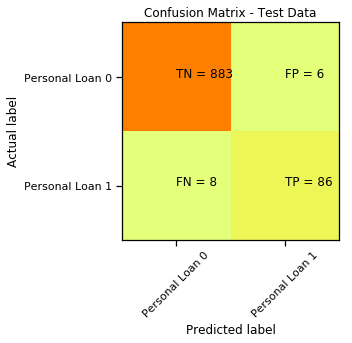

In [93]:
cm = confusion_matrix(y_test, y_test_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Personal Loan 0','Personal Loan 1']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### Inference
- The confusion matrix shows that number of false negatives is 8
- The false negative is of great importance here is because the bank does not want to miss targetting their compaign to someone who islikely to take Personal Loan
- False positives are 6 which is also good
- False positives are less serious in this case

##### Getting data for ROC Curve

In [94]:
y_pred_prob = dt.predict_proba(x_testing_data[subsetColumnList])[:, 1]

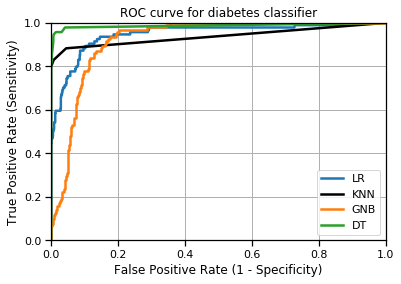

In [95]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob)
plt.plot(fpr_lr, tpr_lr, label = 'LR')
plt.plot(fpr_knn, tpr_knn, color = 'k', label = 'KNN')
plt.plot(fpr_gnb, tpr_gnb, label = 'GNB')
plt.plot(fpr_dt, tpr_dt, label = 'DT')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc = 'lower right')
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [96]:
auc_dt = roc_auc_score(y_test, y_pred_prob)
auc_dt

0.9874410645477826

### Inference
- Decision tree model has a cross validated AUC of 0.99

## Summary

In [97]:
data_summary = [[df_score_knn.loc['Training','Accuracy'], df_score_lr.loc['Training', 'Accuracy'], df_score_gnb.loc['Training','Accuracy'], df_score_dt.loc['Training', 'Accuracy']],[df_score_knn.loc['Testing','Accuracy'], df_score_lr.loc['Testing', 'Accuracy'], df_score_gnb.loc['Testing','Accuracy'], df_score_dt.loc['Testing', 'Accuracy']],[df_score_knn.loc['Training','f1-Score'], df_score_lr.loc['Training', 'f1-Score'], df_score_gnb.loc['Training','f1-Score'], df_score_dt.loc['Training', 'f1-Score']],[df_score_knn.loc['Testing','f1-Score'], df_score_lr.loc['Testing', 'f1-Score'], df_score_gnb.loc['Testing','f1-Score'], df_score_dt.loc['Testing', 'f1-Score']],[df_score_knn.loc['Training','Recall Score'], df_score_lr.loc['Training', 'Recall Score'], df_score_gnb.loc['Training','Recall Score'], df_score_dt.loc['Training', 'Recall Score']],[df_score_knn.loc['Testing','Recall Score'], df_score_lr.loc['Testing', 'Recall Score'], df_score_gnb.loc['Testing','Recall Score'], df_score_dt.loc['Testing', 'Recall Score']],[auc_knn,auc_lr,auc_gnb, auc_dt]]
metrc = ['Training Accuracy', 'Testing Accuracy', 'Training f1-Score', 'Testing f1-Score', 'Training Recall Score', 'Testing Recall Score','AUC']
mods = ['KNN', 'Logistic Regression', 'Naive Bayes', 'Decision Tree']
score_summary = pd.DataFrame(data_summary,index = metrc, columns = mods)
summary_stats = score_summary.T
summary_stats

,Training Accuracy,Testing Accuracy,Training f1-Score,Testing f1-Score,Training Recall Score,Testing Recall Score,AUC
KNN,0.986012,0.976602,0.971264,0.917647,0.924761,0.871508,0.937325
Logistic Regression,0.947864,0.949135,0.703329,0.687500,0.788961,0.833333,0.948681
Naive Bayes,0.904883,0.898271,0.561033,0.494949,0.509595,0.471154,0.922768
Decision Tree,0.988555,0.985758,0.940239,0.924731,0.956757,0.934783,0.987441


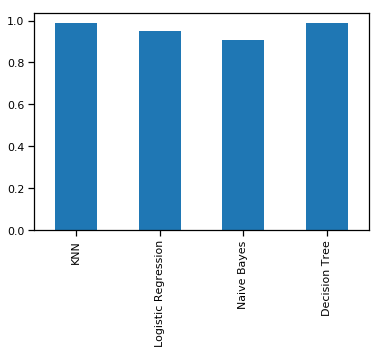

In [98]:
summary_stats['Training Accuracy'][0:].plot.bar();

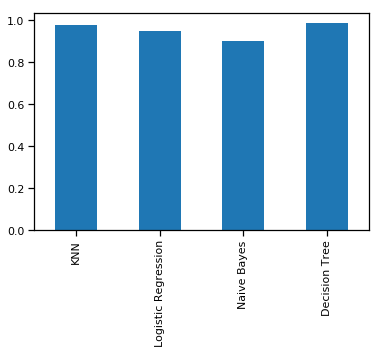

In [99]:
summary_stats['Testing Accuracy'][0:].plot.bar();

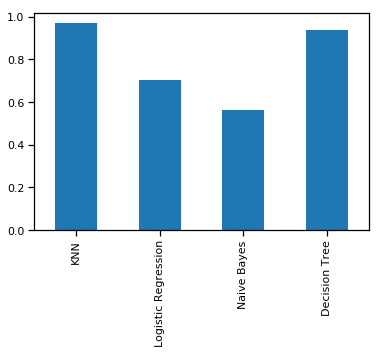

In [100]:
summary_stats['Training f1-Score'][0:].plot.bar();

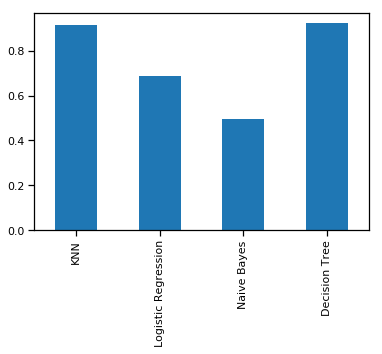

In [101]:
summary_stats['Testing f1-Score'][0:].plot.bar();

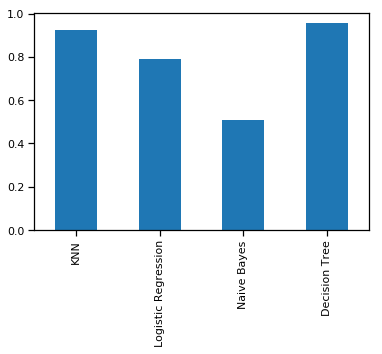

In [102]:
summary_stats['Training Recall Score'][0:].plot.bar();

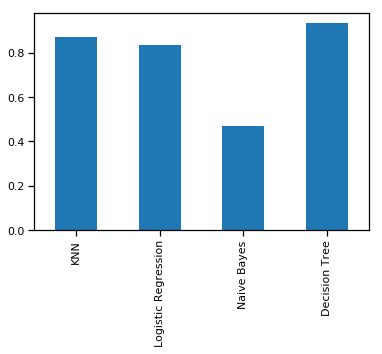

In [103]:
summary_stats['Testing Recall Score'][0:].plot.bar();

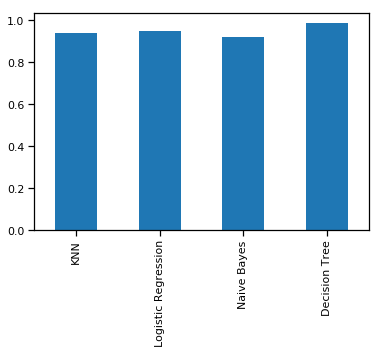

In [104]:
summary_stats['AUC'][0:].plot.bar();

### Decision tree has the highest recall, accuracy and AUC. Hence the model to be chosen is Decision tree. 
### During production the weights can be callibrated for best performance in real life